<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Ecuaciones-Diferenciales-Parciales-2/blob/main/M%C3%A9todo%20de%20Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Galerkin**

Este es un tipo de método de residuos pesados, donde las funciones de peso coinciden con las funciones base $\beta_i$

Queremos resolver la ecuación

$ - \frac{d^2u}{dx^2} + u - x = 0$

sujeta a las condiciones

$u(0)=u(1)=0$

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Analiticamente:

In [3]:
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [8]:
ode = - u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [11]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

In [12]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [13]:
# Convertimos en un arreglo de numpy
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

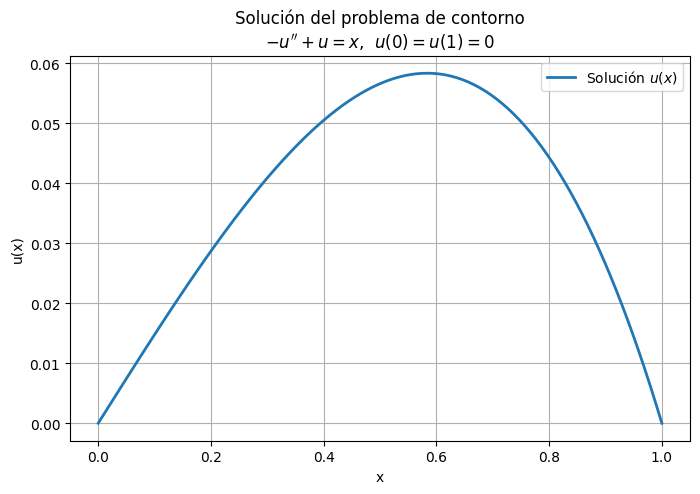

In [15]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$- u'' + u = x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
a, b, c = sp.symbols('a b c')
beta_1 =  sp.sin(sp.pi * x)
beta_2 =  sp.sin(2*sp.pi * x)
beta_3 =  sp.sin(3*sp.pi * x)

#Función de prueba u_n(x) que cumple u(0)=u(1)=0
u_3 = a*beta_1 + b*beta_2 + c*beta_3

In [19]:
u_3

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)

Definimos el residuo (error) E

In [23]:
u_3_d_2 = sp.diff(u_3, x, 2)

E = - u_3_d_2 + u_3 - x

In [24]:
E

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [25]:
E.simplify()

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

Ahora, imponemos las condiciones:

$\int\limits_0^1E(\sin \left(\pi x\right))dx = 0$

$\int\limits_0^1E(\sin \left(2\pi x\right))dx = 0$

$\int\limits_0^1E(\sin \left(3\pi x\right))dx = 0$

In [27]:
I_1 = sp.integrate(E*beta_1, (x, 0, 1))
I_2 = sp.integrate(E*beta_2, (x, 0, 1))
I_3 = sp.integrate(E*beta_3, (x, 0, 1))

In [28]:
I_1

a/2 + pi**2*a/2 - 1/pi

In [29]:
I_2

b/2 + 2*pi**2*b + 1/(2*pi)

In [30]:
I_3

c/2 + 9*pi**2*c/2 - 1/(3*pi)

In [31]:
soleq = sp.solve([I_1, I_2, I_3], [a, b, c],  simplify=True) # para igualar  a 0
soleq

{a: 2/(pi + pi**3), b: -1/(pi + 4*pi**3), c: 2/(3*pi + 27*pi**3)}

In [32]:
u_approx = u_3.subs(soleq)

In [33]:
u_approx

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [34]:
u_approx.simplify()

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [35]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

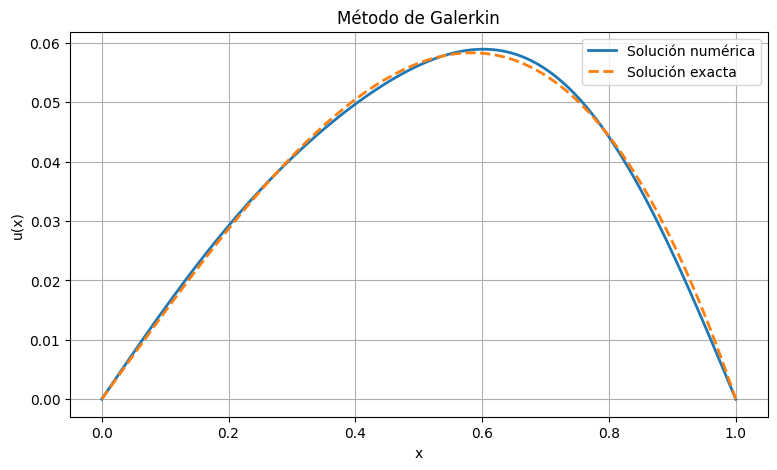

In [36]:
# Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método de Galerkin")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Error de aproximación

In [41]:
#Calculamos el error
error = np.abs(yy - u_approx_fn(xx))
error_max = np.max(error)
print("Error máximo: ", error_max)

Error máximo:  0.001981555865915169
